<a href="https://colab.research.google.com/github/N1a2t3a/.Data_Science/blob/main/HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [33]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [34]:
def create_model(num_layers, num_neurons, activation_function):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))

    for _ in range(num_layers):
        model.add(layers.Dense(num_neurons, activation=activation_function))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.3))

    model.add(layers.Dense(10, activation='softmax'))
    return model

In [35]:
def compile_model(model, optimizer_type):
    model.compile(optimizer=optimizer_type,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [36]:
def train_model(model, train_images, train_labels, epochs, batch_size):
    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    return history

In [37]:
def plot_results(history, num_layers, num_neurons, activation_function, optimizer_type):
    plt.plot(history.history['accuracy'], label=f'Training Acc ({num_layers} layers, {num_neurons} neurons, {activation_function}, {optimizer_type})')
    plt.plot(history.history['val_accuracy'], label=f'Validation Acc ({num_layers} layers, {num_neurons} neurons, {activation_function}, {optimizer_type})')

In [38]:
epochs = 10
batch_size = 64

In [39]:
num_layers_list = [2, 3]
num_neurons_list = [128, 256]
activation_functions = ['relu', 'sigmoid']
optimizers_list = ['adam', 'sgd']

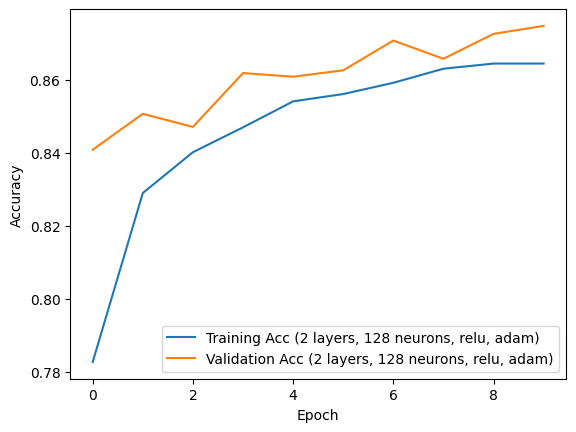

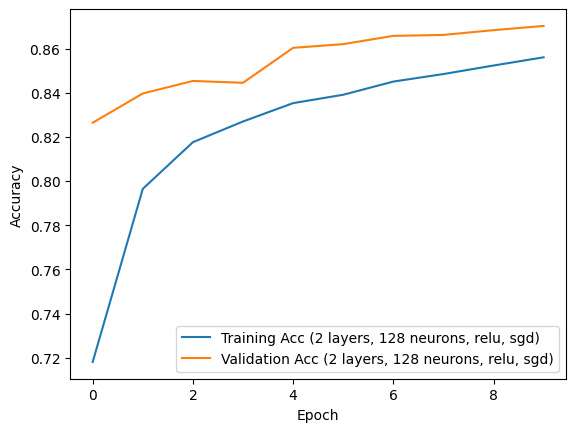

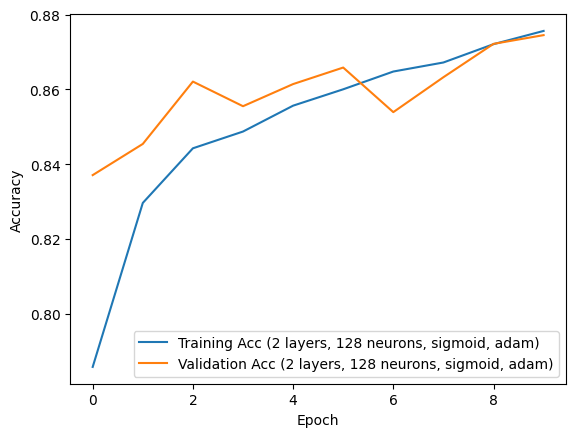

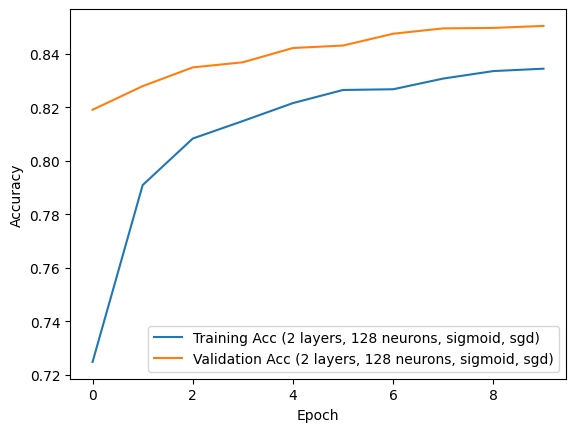

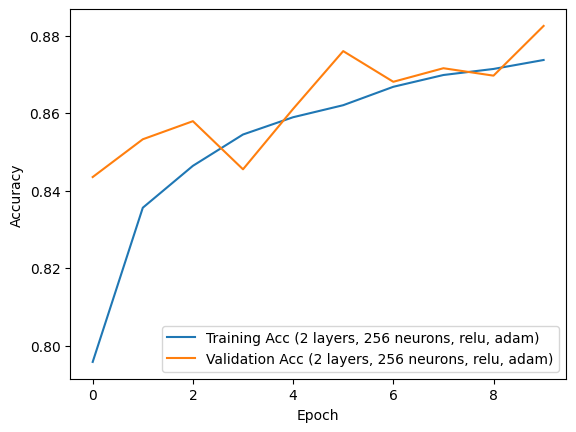

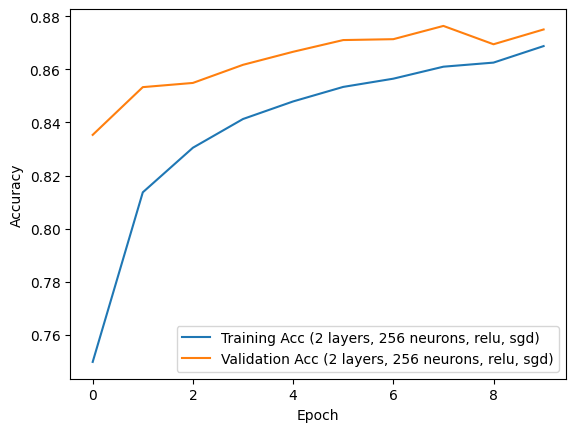

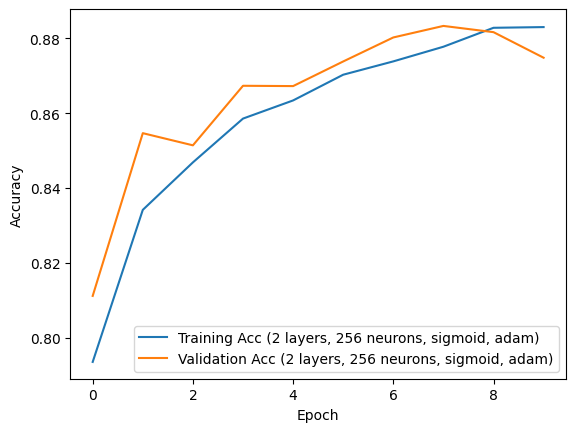

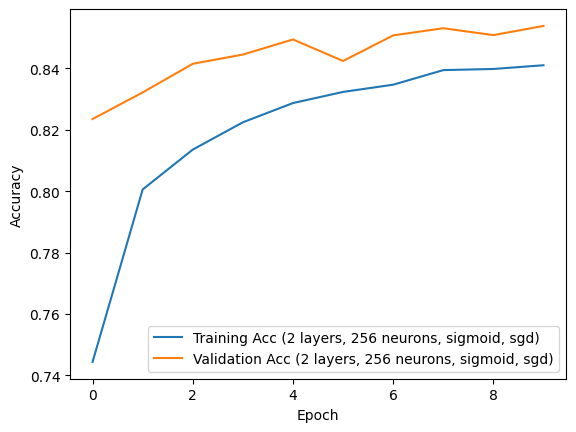

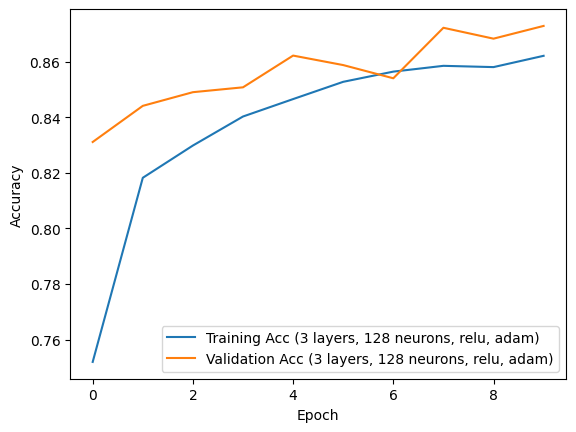

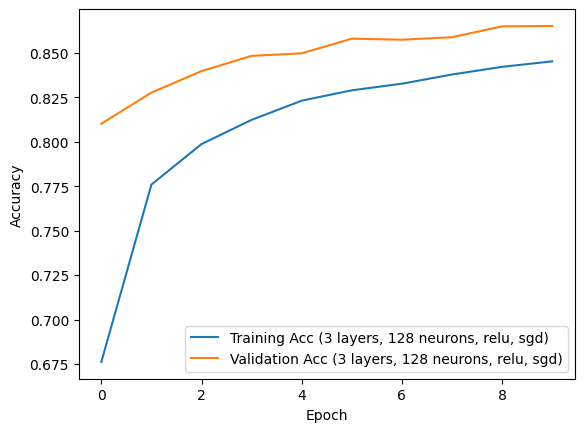

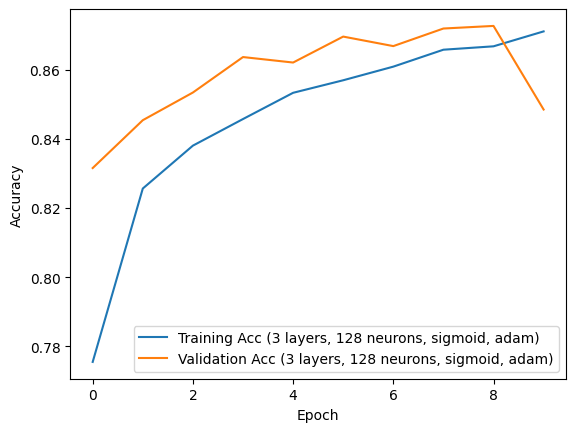

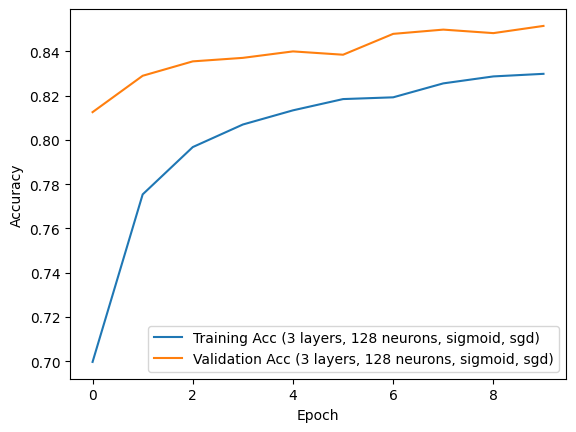

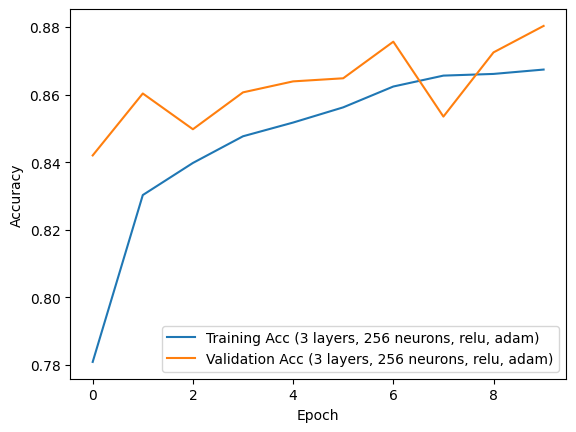

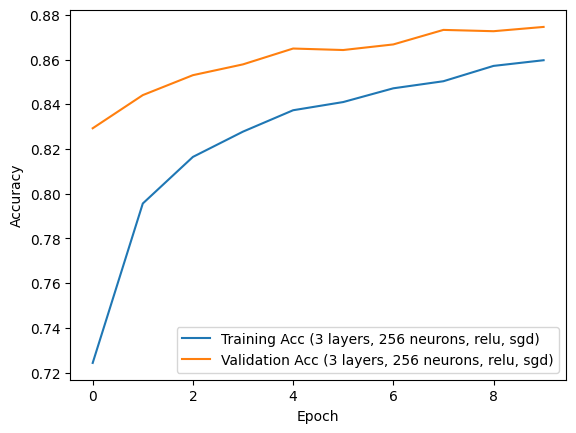

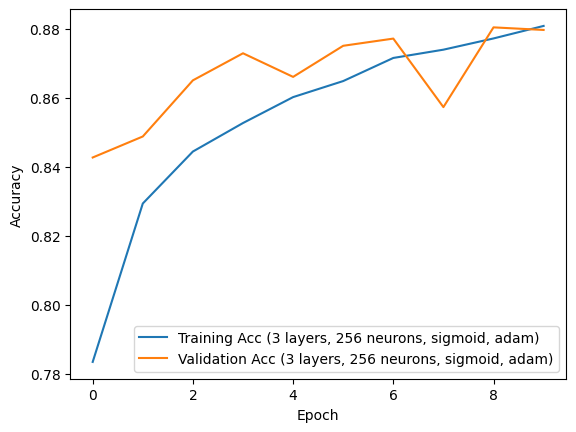

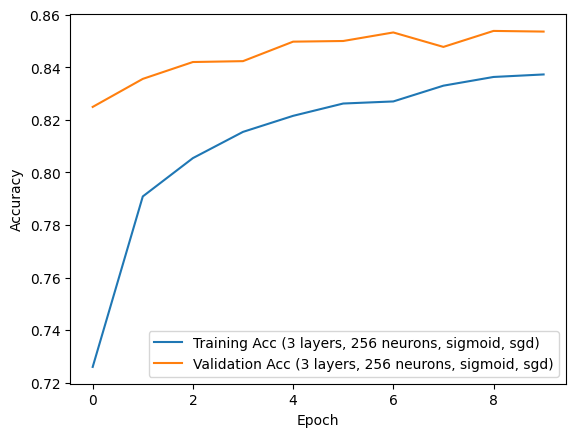

In [40]:
for num_layers in num_layers_list:
    for num_neurons in num_neurons_list:
        for activation_function in activation_functions:
            for optimizer_type in optimizers_list:
                model = create_model(num_layers, num_neurons, activation_function)
                model = compile_model(model, optimizer_type)
                history = train_model(model, train_images, train_labels, epochs, batch_size)
                plot_results(history, num_layers, num_neurons, activation_function, optimizer_type)

                plt.xlabel('Epoch')
                plt.ylabel('Accuracy')
                plt.legend()
                plt.show()